# Homework 1 Problem 5

Here is how I solved Problem 5 on Homework 1, using a Python script. Skip to the end if you want to see the full script with the output plot. The script is really quite short! I'll give some details and insight into my thinking (Danger! Danger!) in the meantime...

First, take a look at the equation of motion for a 2-D projectile under quadratic drag:

$\dot{\vec{v}}=-g\hat{y}-\frac{c}{m}v^{2}\hat{v}=-g\hat{y}-\frac{0.157\rho D^{2}}{m}v^{2}\hat{v}$

$\dot{v}_{x}=-\frac{0.157\rho D^{2}}{m}v_{x}\sqrt{v^{2}_{x}+v^{2}_{y}}$

$\dot{v}_{y}=-g-\frac{0.157\rho D^{2}}{m}v_{y}\sqrt{v^{2}_{x}+v^{2}_{y}}$

Here, I took the equations I gave you in lecture and made the following substitution for our specific problem: $F(v)=cv^{2}=0.157\rho D^{2}v^{2}$. These are coupled, non-linear ODEs, so we cannot solve them in closed form. Never fear! The Python program "odeint" will easily handle these equations for us. We just need a little guidance on the syntax.

Let's define the following four kinematic variables in Python:

| Equation Variable | Python Variable |
|------|------|
| $x$ | xpos |
| $v_{x}$ | xvelo |
| $y$ | ypos |
| $v_{y}$ | yvelo |

Python will numerically calculate these for us, based on our description of the ODEs. We'll define a Python array to hold these calculated values. I'll call it "r" and let the entires in the array go as follows: r = (xpos, xvelo, ypos, yvelo).

I could just hard-code the constants given in our problem. A better practice is to assign a variable in the script to hold a constant. I can then initialize that variable to whatever the problem demands. This will make it easier, e.g. when we switch from the air density in Houston to that in Denver. To make life easy, then, I'll define the following for the constants given in the problem:

| Given Constant | Python Variable |
|------|------|
| 0.157 | s |
| density of air | p |
| diameter of baseball | d |
| mass of baseball | m |
| acceleration due to gravity | g |

Now, I can transcribe my ODEs above into Python syntax. We do this by defining the derivatives of the kinematic variables we defined above. So, my derivative array will be the equivalent of dr/dt = (dxpos/dt,dxvelo/dt,dypos/dt,dyvelo/dt). We won't write it exactly like that, of course; but that's the idea. "dxpos/dt" is what we've already called "xvelo." Same with "dypos/dt" and "yvelo." So, those entries in the array are easy! "dxvelo/dt" and "dyvelo/dt" will be a straight transcription of our equations above. Without further ado, in Python syntax, our derviative array will be

Note: I used the Python command np.sqrt(value) to compute the square roots. We'll set this definition inside a function called "deriv," as follows:

So, there's our set of ODEs. The way we'll have Python solve it is by passing our derivative function the initial conditions and letting it numerically compute the velocities and positions for a whole mess of subsequent time values. Like we did with the constants, let's define some Python variables to hold the initial conditions:

| Intial Condition | Python Variable |
|------|------|
| Initial speed | ispeed |
| Launch angle | theta |

We can let our initial x and y positions be zero. Again, you could calculate the initial x and y components of velocity by hand, but why not let Python do it for you?! So, the array of intial conditions, which we'll pass to our derivative function, will be

Note: I used the Python commands np.cos(value) and np.sin(value) to calculate sine and cosine of the launch angle for me. Finally, we need to decide over what interval of time and how finely segmented we want our time values to be. Let's have our program solve the equations from t = 0 to 5 seconds with 1000 calculations over that interval. The way we tell Python to do this is by the following command:

Now, I have everything I need to solve my ODEs! The command to tell Python to get to work is the following:

odeint will return an array of the calculated xpos, xvelo, ypos, and yvelo values for each increment of time. This is really fantastic, since it makes it trivial to make any set of plots we want, e.g. x vs. t, y vs. t, y vs. x, yvelo vs. xvelo, or any comination thereof. For our above problem, what we really need is to find the x value when y returns to zero. So, we can plot y vs. x as follows:

We're telling the plotter to plot the "2nd" vs. "0th" vectors in the sol array, i.e. ypos vs. xpos. Also, we're telling it to color the line blue, since blue is an awesome color. Done! Problem solved. Full script with output plot below...

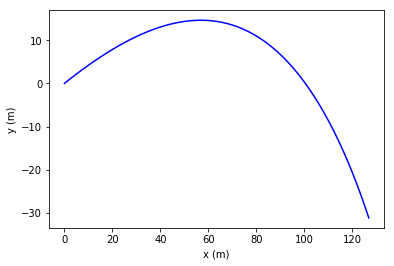

In [13]:
#
#  HW1.py
#
#
#  Created by Jim Drachenberg on 9/5/19.
#

from scipy.integrate import odeint
from pylab import * # for plotting commands

#---------------------------------------------------------
# Define the deriv function, which sets the system of ODEs
def deriv(r,t,s,p,d,m,g): # return derivatives of the array r
    xpos, xvelo, ypos, yvelo = r
    drdt = [xvelo, -1*(s*p*d*d/m)*xvelo*np.sqrt(xvelo*xvelo+yvelo*yvelo), yvelo, -g - (s*p*d*d/m)*yvelo*np.sqrt(xvelo*xvelo+yvelo*yvelo)]
    return drdt

# End deriv definition
#---------------------------------------------------------


#Solving the ode set:

#---------------------------------------------------------
# Yordan Alvarez's mashed baseball with quadratic drag
s = 0.157   # shape factor?
p = 1.19    # density of air in kg/m^3
d = 0.08    # diameter of baseball in m
m = 0.150   # mass of the baseball in kg
g = 9.8     # acceleration due to gravity in m/s
theta = 24.0*np.pi/180.0    # launch angle in radians
ispeed = 50.16              # exit speed in m/s

r0 = [0.0, ispeed*np.cos(theta), 0.0, ispeed*np.sin(theta)]
t = np.linspace(0, 5, 1000)
sol = odeint(deriv,r0,t,args=(s,p,d,m,g))
figure()
plot(sol[:,0],sol[:,2],'b')
xlabel('x (m)')
ylabel('y (m)')
show()

Looks to me like a range of around 100 m, i.e. around 330 ft. Statcast estimates the actual distance traveled to be 474 ft (upper deck!). So, clearly we're still leaving out something of pretty substantial importance. Any ideas...